In [3]:
%%latex

Solution to 3(a)

Asked to prove that the Poisson distribution is part of the exponential family.

The Poisson distribution is defined as:

\begin{align*}
p(y ; \lambda) &= \frac{e^{-\lambda} \lambda^{y}}{y!}\\
    &= \frac{e^{-\lambda} e^{\log \lambda^{y}}}{y!}\\
    &= \frac{1}{y!} \exp (y\log \lambda - \lambda).\\
\end{align*}

Note that the exponential family is characterised by:

$$p(y ; \eta) = b(y) \exp [\eta^{T} T(y) - a(\eta)].$$

So the Poisson distribution is part of the exponential family with $T(y) = y$, $b(y) = \frac{1}{y!}$, $\eta = \log \lambda$, and $a(\eta) = \lambda = \exp (\eta)$.

<IPython.core.display.Latex object>

In [4]:
%%latex

Solution to 3(b)

A reminder on what the General Linear Model is: the exponential family only talks about the distribution of data, specifically the outputs $y$. The General Linear Model incorporates the inputs $x$ as well. The assumptions made for General Linear Model are:

1) $y \mid x; \theta \sim \text{ExpFamily}(\eta)$
2) $\eta = \theta^{T}x$
3) $h_{\theta} = \mathbb{E}(y \mid x; \theta)$

The canonical response function is defined as: $g(\eta) = \mathbb{E}(y \mid \eta)$. One convenient property of the exponential family is that $\mathbb{E}(y \mid \eta) = \frac{\partial}{\partial \eta} a(\eta)$, so in this case, $g(\eta) = \exp (\eta)$.


<IPython.core.display.Latex object>

In [5]:
%%latex

Solution to 3(c)

\begin{align*}
\log (p(y^{(i)} \mid x^{(i)}; \theta)) &= \log(1/y^{(i)} \exp (\eta^{T}y^{(i)}-\exp \eta))\\
    &= \log(1/y^{(i)}) + \eta^{T}y^{(i)} - \exp \eta \\
    &= \log(1/y^{(i)}) + \theta^{T}x^{(i)}y^{(i)} - \exp (\theta^{T}x^{(i)}) \\
\Rightarrow \frac{\partial}{\partial \theta_j} \log (p(y^{(i)} \mid x^{(i)}; \theta)) &= \frac{\partial}{\partial \theta_j} \left[ \log(1/y^{(i)}) + \theta^{T}x^{(i)}y^{(i)} - \exp (\theta^{T}x^{(i)})\right] \\
    &= x_j^{(i)}y^{(i)} - x_j^{(i)}\exp (\theta^{T}x^{(i)}) \\
    &= (y^{(i)} - \exp (\theta^{T}x^{(i)}))x_j^{(i)}
\end{align*}

Substituting this into the gradient ascent update rule, we get:

$$\theta_j \mapsto \theta_j + \alpha (y^{(i)} - \exp (\theta^{T}x^{(i)}))x_j^{(i)}$$

Remark: it is actually generally true that the gradient ascent update rule for any general linear model is given by

$$\theta_j \mapsto \theta_j + \alpha (y^{(i)} - h_{\theta}(x^{(i)}))x_j^{(i)}$$

where $h_{\theta}$ is the canonical response function. In this case, $h_{\theta} = \exp (\theta^{T}x^{(i)})$ since dealing with the Poisson distribution.

<IPython.core.display.Latex object>

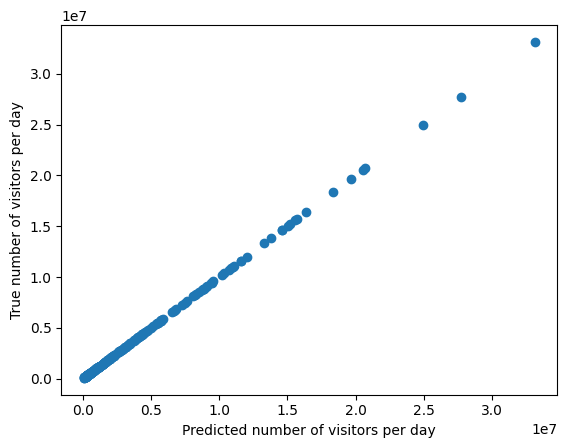

In [23]:
import numpy as np
import util
import matplotlib.pyplot as plt

from linear_model import LinearModel

# Solution to 3(d)

def main(lr, train_path, eval_path, pred_path):
    """Problem 3(d): Poisson regression with gradient ascent.

    Args:
        lr: Learning rate for gradient ascent.
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        pred_path: Path to save predictions.
    """
    # Load training set
    x_train, y_train = util.load_dataset(train_path, add_intercept=False)

    # *** START CODE HERE ***

    # Initialise Poisson regression model
    clf = PoissonRegression(step_size=lr)
    clf.fit(x_train, y_train)
    # Import the validation data set
    x_eval, y_eval = util.load_dataset(eval_path, add_intercept=False)
    y_pred = clf.predict(x_eval)
    # Plot the decision boundary on validation data set
    plt.figure()
    plt.plot(y_pred, y_eval, linestyle="", marker="o")
    plt.xlabel('Predicted number of visitors per day')
    plt.ylabel('True number of visitors per day')
    # Record predictions on validation set
    #y_pred = clf.predict(x_eval)
    # Save outputs to pred_path
    #np.savetext(y_pred, pred_path) 
    
    # *** END CODE HERE ***


class PoissonRegression(LinearModel):
    """Poisson Regression.

    Example usage:
        > clf = PoissonRegression(step_size=lr)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run gradient ascent to maximize likelihood for Poisson regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        # *** START CODE HERE ***

        # Initialise theta
        self.theta = np.zeros(x.shape[1])
        # Run gradient ascent (in matrix form)
        while True:
            gradient = x.T @ (y - np.exp(x @ self.theta))
            old_theta = np.copy(self.theta)
            self.theta += self.step_size * gradient / x.shape[0]
            if np.linalg.norm(self.theta - old_theta) < self.eps:
                break

        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Floating-point prediction for each input, shape (m,).
        """
        # *** START CODE HERE ***

        # The canonical response function found from previous exercise
        return np.exp(x @ self.theta)

        # *** END CODE HERE ***


# Experiment with learning rate
if __name__ == '__main__':
    main(lr=1e-7, train_path='../data/ds4_train.csv', eval_path='../data/ds4_valid.csv', pred_path='./output/3d-predictions.txt')
